In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
user_info=pd.read_csv('/Users/paxton615/GA/DSI9-lessons/projects/user_info_2.csv')

In [3]:
def data_glimps(dataset):    
    print("Shape:",dataset.shape,"\n")
    print("Types:\n",dataset.dtypes,"\n")
    print("isnull:\n",dataset.isnull().sum(),"\n")
    print("Columns_names:\n",dataset.columns,"\n")
    
    fig,ax = plt.subplots(figsize=(9,7),squeeze=True)
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax.set_xticklabels(ax.xaxis.get_ticklabels(),fontsize=13,rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(),fontsize=13,rotation=30)
    sns.heatmap(dataset.corr(),vmin=-1, vmax=1, mask=mask, annot=True,ax=ax)
    plt.show()
    "\n"
    set_option('precision',5)

    display(dataset.describe())
    display(dataset.head())
    display(dataset.tail())

# The target is focus on how to get more subscriptions. 

# 1. Final check on the dataset

Shape: (53432, 12) 

Types:
 Unnamed: 0                  int64
user_id                   float64
watched_cnts              float64
play_duration             float64
following_program_cnts    float64
following_video_cnts      float64
comment_cnts              float64
sub_video_counts          float64
device_type               float64
province                   object
signin_days               float64
sub_or_not                  int64
dtype: object 

isnull:
 Unnamed: 0                0
user_id                   0
watched_cnts              0
play_duration             0
following_program_cnts    0
following_video_cnts      0
comment_cnts              0
sub_video_counts          0
device_type               0
province                  0
signin_days               0
sub_or_not                0
dtype: int64 

Columns_names:
 Index(['Unnamed: 0', 'user_id', 'watched_cnts', 'play_duration',
       'following_program_cnts', 'following_video_cnts', 'comment_cnts',
       'sub_video_counts', 'devic

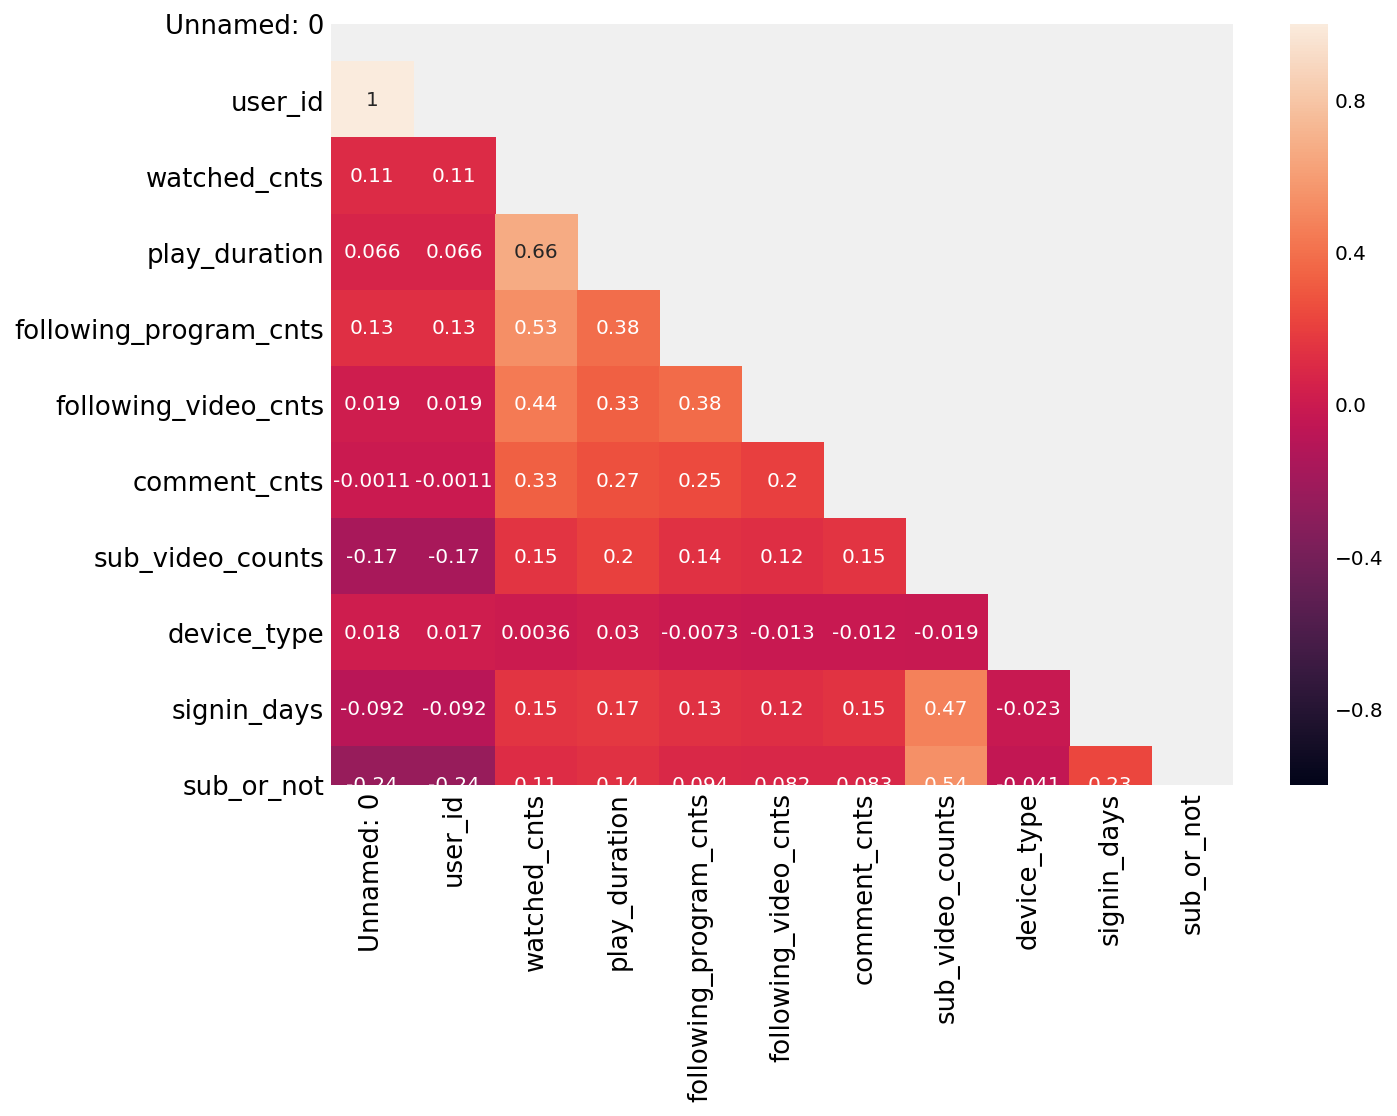

,Unnamed: 0,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,signin_days,sub_or_not
count,53432.00000,53432.00000,53432.00000,5.34320e+04,53432.00000,53432.00000,53432.00000,53432.00000,53432.00000,53432.00000,53432.00000
mean,26715.50000,27830.82078,59.58111,3.74552e+03,0.84683,4.73347,0.30218,0.42128,3.05835,0.68362,0.14181
std,15424.63413,15613.82075,170.65959,1.62406e+04,2.10797,21.92202,3.40864,1.91662,0.46954,5.25814,0.34885
min,0.00000,303.00000,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,13357.75000,14329.75000,1.00000,1.90000e+01,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000,0.00000
50%,26715.50000,27832.50000,10.00000,4.54000e+02,0.00000,1.00000,0.00000,0.00000,3.00000,0.00000,0.00000
75%,40073.25000,41314.25000,47.00000,2.23900e+03,1.00000,3.00000,0.00000,0.00000,3.00000,0.00000,0.00000
max,53431.00000,55006.00000,6256.00000,1.30751e+06,44.00000,2892.00000,345.00000,50.00000,4.00000,372.00000,1.00000


,Unnamed: 0,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days,sub_or_not
0,0,303.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,北京,0.0,0
1,1,306.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,安徽,0.0,0
2,2,309.0,689.0,57835.0,9.0,52.0,31.0,12.0,4.0,四川,31.0,1
3,3,310.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,浙江,0.0,0
4,4,311.0,549.0,87544.0,4.0,38.0,25.0,21.0,4.0,山西,2.0,1


,Unnamed: 0,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days,sub_or_not
53427,53427,55002.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0.0,0
53428,53428,55003.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,0.0,0
53429,53429,55004.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0,0.0,0
53430,53430,55005.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0.0,0
53431,53431,55006.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0,0.0,0


In [4]:
data_glimps(user_info)

In [5]:
# keep a copy of original dataset
user_info_copy=user_info.copy()


In [6]:
# replace np.nan with 0
user_info.replace(np.nan,0,inplace=True)

In [7]:
user_info.columns

Index(['Unnamed: 0', 'user_id', 'watched_cnts', 'play_duration',
       'following_program_cnts', 'following_video_cnts', 'comment_cnts',
       'sub_video_counts', 'device_type', 'province', 'signin_days',
       'sub_or_not'],
      dtype='object')

In [8]:
user_info.drop(['Unnamed: 0','sub_video_counts'],axis=1,inplace=True)

In [9]:
user_info.set_index('user_id',drop=True,inplace=True)

In [10]:
# dummify 'province'
#user_info=pd.get_dummies(user_info, columns=['province'],drop_first=True)

# 2. Descriptive Statistics

Shape: (53432, 9) 

Types:
 watched_cnts              float64
play_duration             float64
following_program_cnts    float64
following_video_cnts      float64
comment_cnts              float64
device_type               float64
province                   object
signin_days               float64
sub_or_not                  int64
dtype: object 

isnull:
 watched_cnts              0
play_duration             0
following_program_cnts    0
following_video_cnts      0
comment_cnts              0
device_type               0
province                  0
signin_days               0
sub_or_not                0
dtype: int64 

Columns_names:
 Index(['watched_cnts', 'play_duration', 'following_program_cnts',
       'following_video_cnts', 'comment_cnts', 'device_type', 'province',
       'signin_days', 'sub_or_not'],
      dtype='object') 



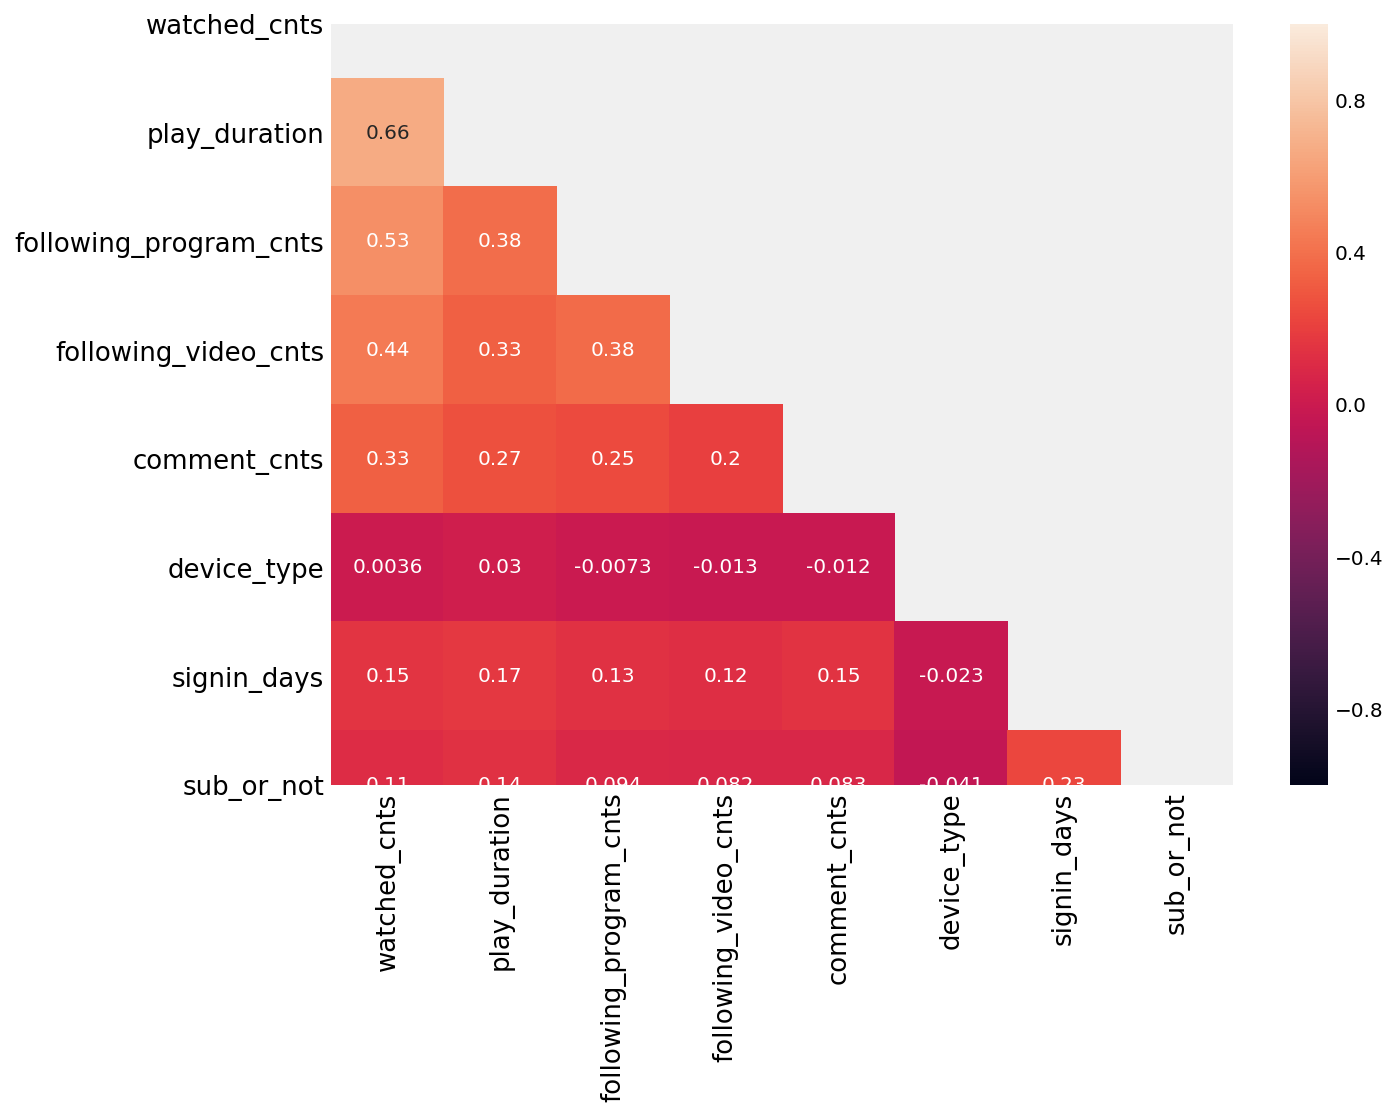

,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,device_type,signin_days,sub_or_not
count,53432.00000,5.34320e+04,53432.00000,53432.00000,53432.00000,53432.00000,53432.00000,53432.00000
mean,59.58111,3.74552e+03,0.84683,4.73347,0.30218,3.05835,0.68362,0.14181
std,170.65959,1.62406e+04,2.10797,21.92202,3.40864,0.46954,5.25814,0.34885
min,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,1.90000e+01,0.00000,0.00000,0.00000,3.00000,0.00000,0.00000
50%,10.00000,4.54000e+02,0.00000,1.00000,0.00000,3.00000,0.00000,0.00000
75%,47.00000,2.23900e+03,1.00000,3.00000,0.00000,3.00000,0.00000,0.00000
max,6256.00000,1.30751e+06,44.00000,2892.00000,345.00000,4.00000,372.00000,1.00000


,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,device_type,province,signin_days,sub_or_not
user_id,,,,,,,,,
303.0,0.0,0.0,0.0,0.0,0.0,3.0,北京,0.0,0
306.0,0.0,0.0,0.0,0.0,0.0,3.0,安徽,0.0,0
309.0,689.0,57835.0,9.0,52.0,31.0,4.0,四川,31.0,1
310.0,0.0,0.0,0.0,0.0,0.0,4.0,浙江,0.0,0
311.0,549.0,87544.0,4.0,38.0,25.0,4.0,山西,2.0,1


,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,device_type,province,signin_days,sub_or_not
user_id,,,,,,,,,
55002.0,0.0,0.0,0.0,1.0,0.0,3.0,0,0.0,0
55003.0,0.0,0.0,0.0,0.0,0.0,4.0,0,0.0,0
55004.0,0.0,0.0,0.0,2.0,0.0,4.0,0,0.0,0
55005.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0.0,0
55006.0,0.0,0.0,2.0,0.0,0.0,3.0,0,0.0,0


In [11]:
data_glimps(user_info)

# 3.Visualizations

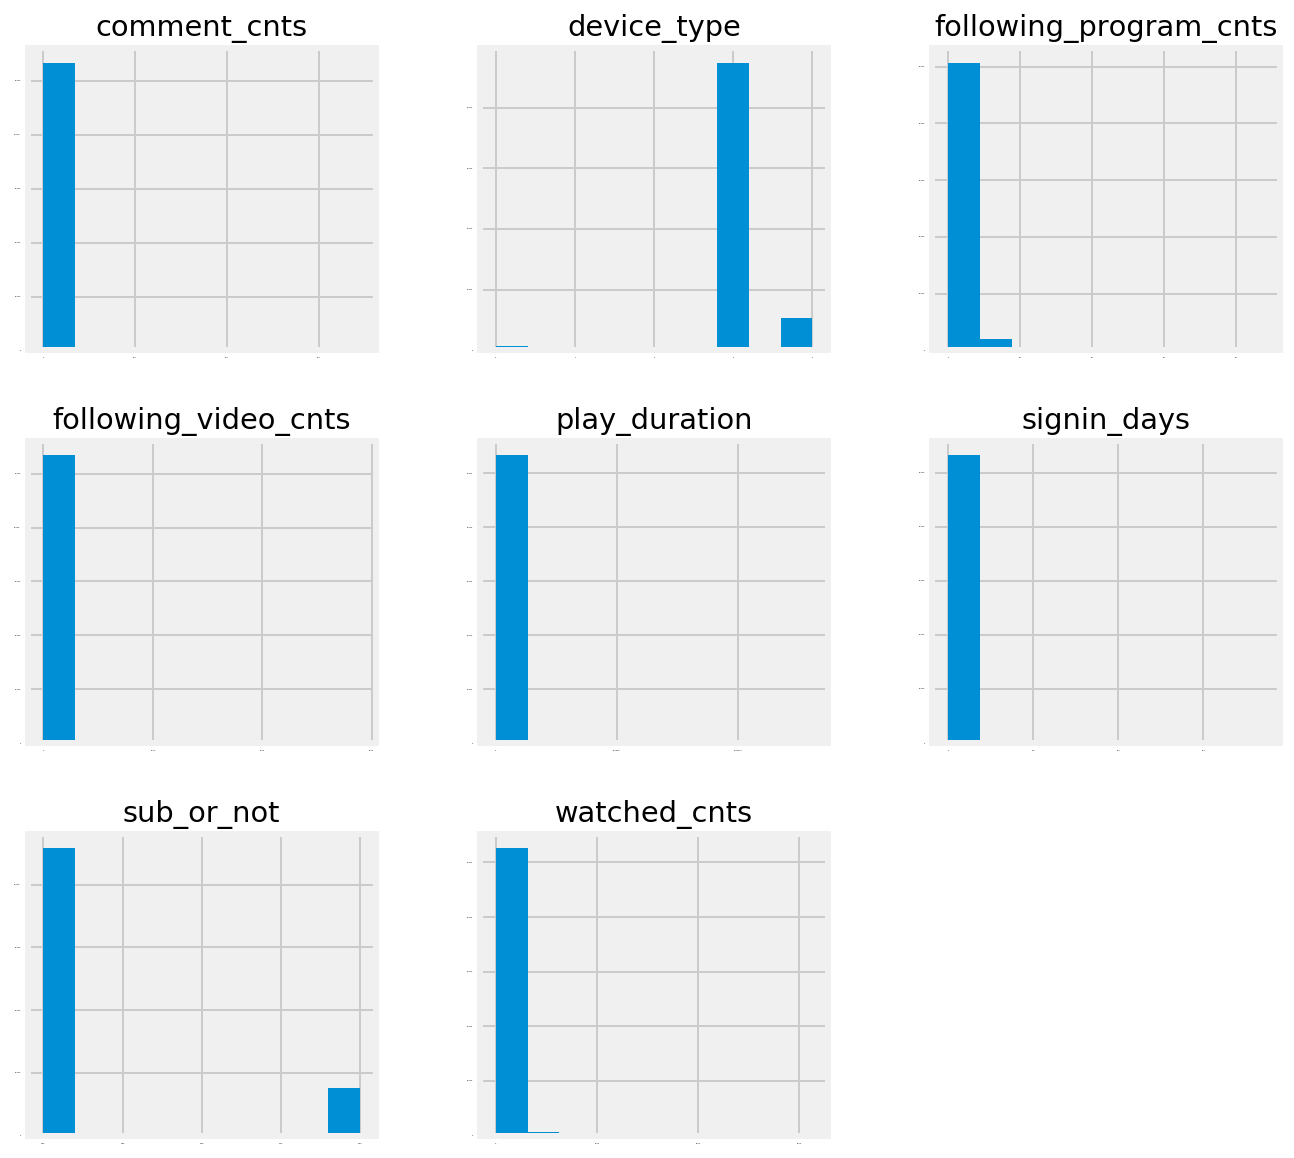

In [12]:
user_info.hist(sharex=False,figsize=(10,10),sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

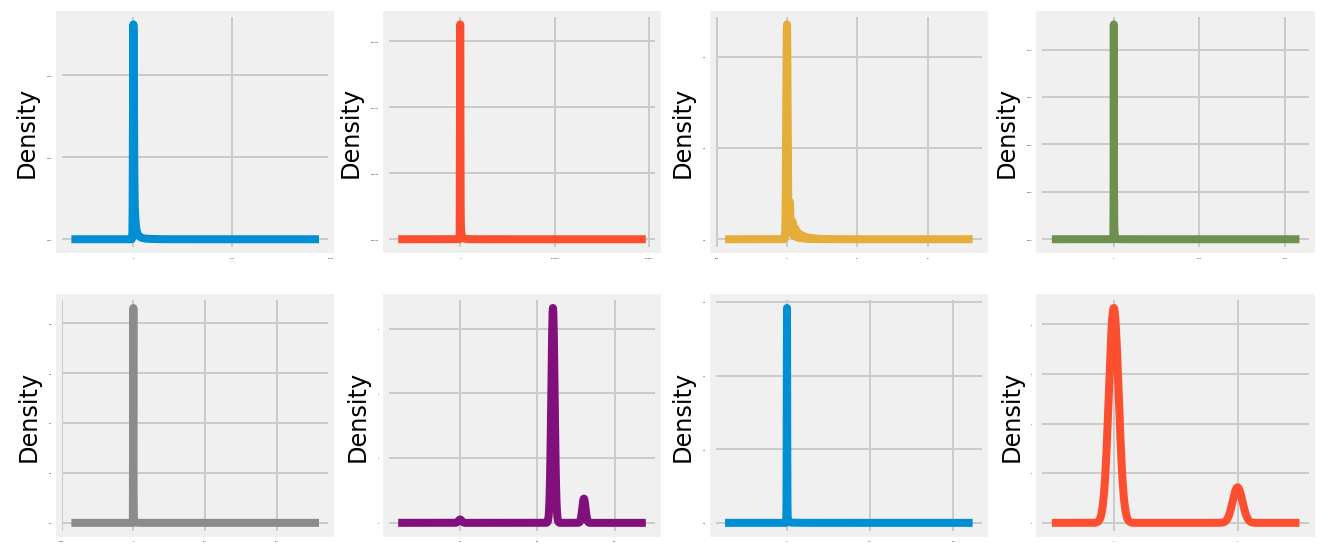

In [13]:
user_info.plot(kind='density',figsize=(10,10), subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.show()

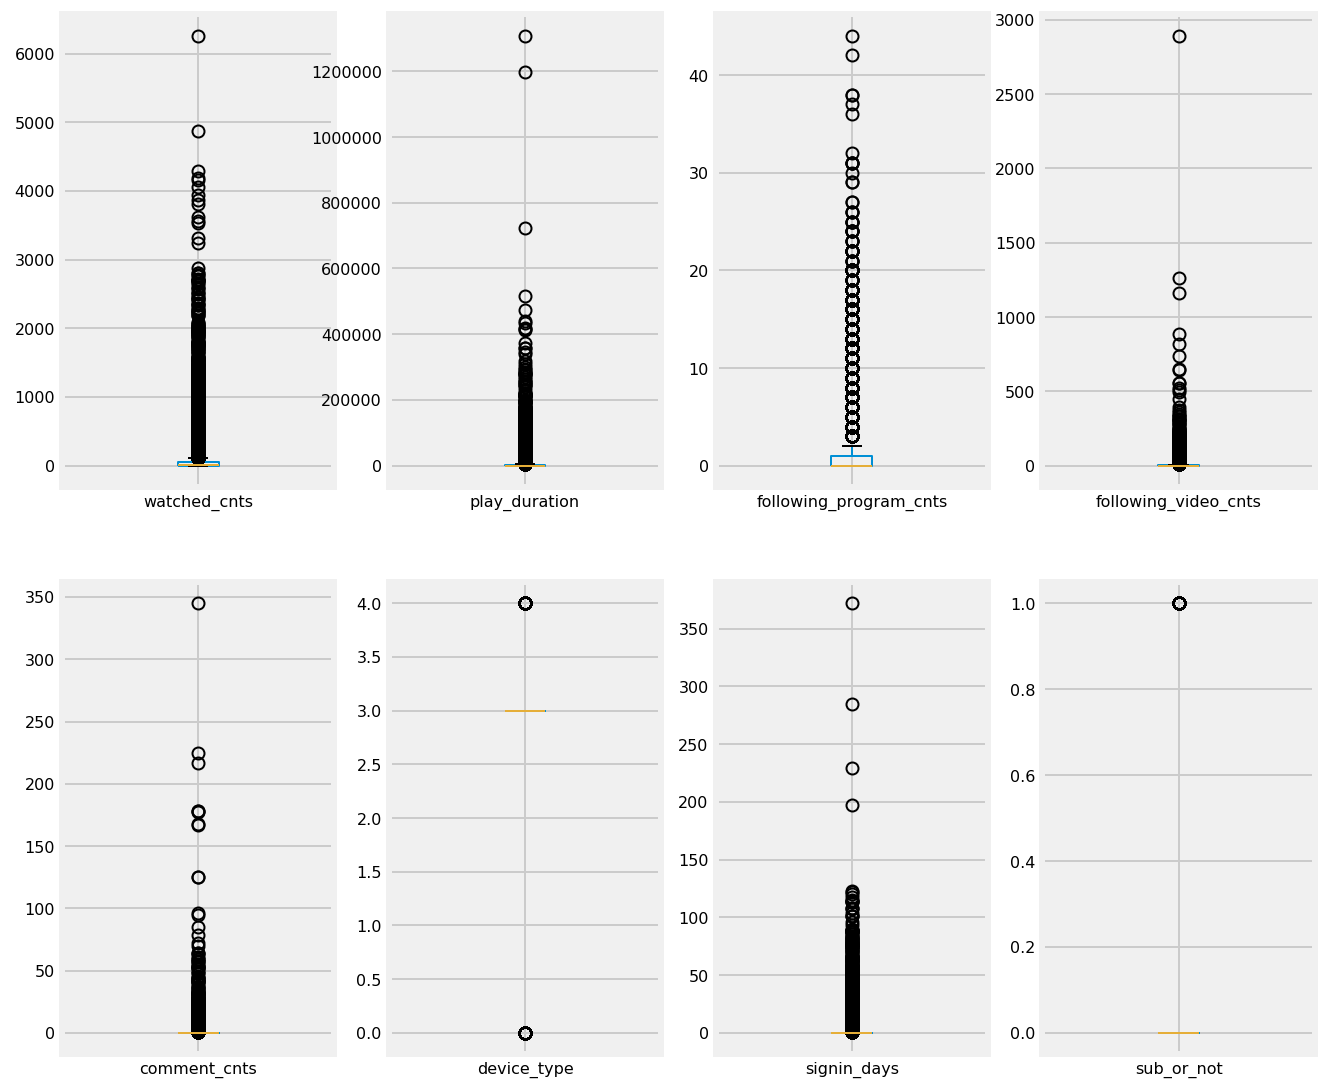

In [14]:
user_info.plot(kind='box',figsize=(10,20),  subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
plt.show()

# 4.Validation Dataset

In [15]:
user_info.head()

,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,device_type,province,signin_days,sub_or_not
user_id,,,,,,,,,
303.0,0.0,0.0,0.0,0.0,0.0,3.0,北京,0.0,0
306.0,0.0,0.0,0.0,0.0,0.0,3.0,安徽,0.0,0
309.0,689.0,57835.0,9.0,52.0,31.0,4.0,四川,31.0,1
310.0,0.0,0.0,0.0,0.0,0.0,4.0,浙江,0.0,0
311.0,549.0,87544.0,4.0,38.0,25.0,4.0,山西,2.0,1


In [16]:
y = user_info.copy().pop('sub_or_not')

In [17]:
X = user_info.copy()[['watched_cnts', 'play_duration',
       'following_program_cnts', 'following_video_cnts', 'comment_cnts',
        'device_type', 'province', 'signin_days']]

In [18]:
X = pd.get_dummies(X, columns=['province'],drop_first=True)

In [19]:
X.head()

,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,device_type,signin_days,province_上海,province_云南,province_内蒙古,...,province_湖南,province_甘肃,province_福建,province_西藏,province_贵州,province_辽宁,province_重庆,province_陕西,province_青海,province_黑龙江
user_id,,,,,,,,,,,,,,,,,,,,,
303.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309.0,689.0,57835.0,9.0,52.0,31.0,4.0,31.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311.0,549.0,87544.0,4.0,38.0,25.0,4.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
validation_size=0.2
seed = 7
X_train,X_test,y_train,y_test = train_test_split(X,y,
        test_size=validation_size, random_state=seed)

# 5.Evaluate Algorithms: Baseline

In [21]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [22]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto'))) # SVM cost a lot of time

In [23]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.869341 (0.005449)
LDA: 0.866510 (0.005622)
KNN: 0.853410 (0.005723)
CART: 0.818084 (0.005924)
NB: 0.857059 (0.005155)


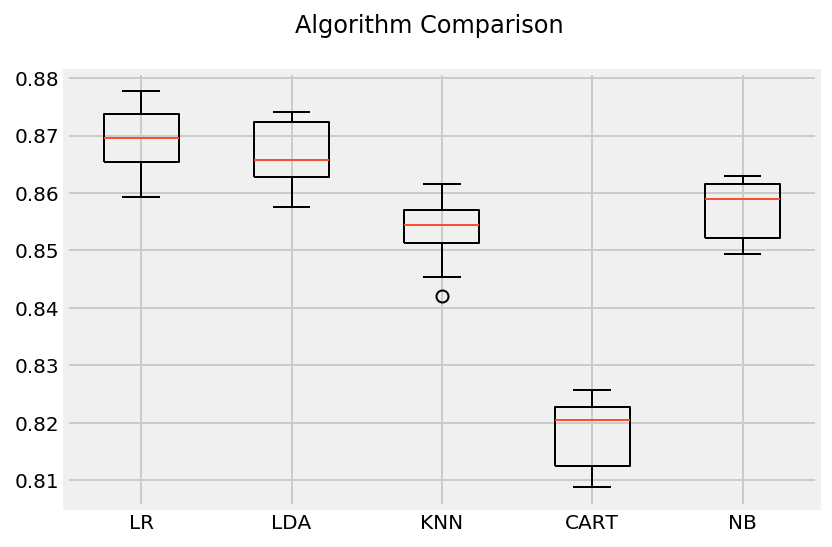

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6.Evaluate Algorithms: Standardization

In [25]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
    LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))

In [26]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.869692 (0.005519)
ScaledLDA: 0.866510 (0.005622)
ScaledKNN: 0.862487 (0.004584)
ScaledCART: 0.818294 (0.007638)
ScaledNB: 0.240262 (0.055240)


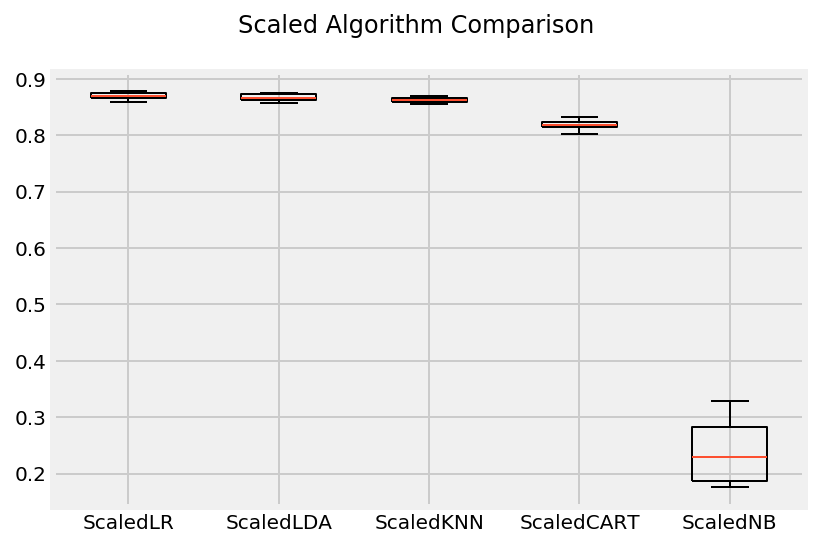

In [27]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 7.Improve Results With GridSearchCV

In [28]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"],'fit_intercept':[True,False]}
model= LogisticRegression()
kfold=KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaledX,y_train)

In [29]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.869692 using {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}
0.864499 (0.005343) with: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l1'}
0.867259 (0.005597) with: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2'}
0.839279 (0.005509) with: {'C': 0.001, 'fit_intercept': False, 'penalty': 'l1'}
0.811089 (0.007101) with: {'C': 0.001, 'fit_intercept': False, 'penalty': 'l2'}
0.868757 (0.005829) with: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l1'}
0.869248 (0.005694) with: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}
0.839888 (0.005786) with: {'C': 0.01, 'fit_intercept': False, 'penalty': 'l1'}
0.837174 (0.006388) with: {'C': 0.01, 'fit_intercept': False, 'penalty': 'l2'}
0.869505 (0.005376) with: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1'}
0.869529 (0.005363) with: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}
0.840332 (0.005868) with: {'C': 0.1, 'fit_intercept': False, 'penalty': 'l1'}
0.840285 (0.005856) with: {'C': 0.1, 'fit_intercept': False, 'pena

# 8.Ensemble Methods

In [30]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.871213 (0.006197)
GBM: 0.873178 (0.006131)
RF: 0.861738 (0.004291)
ET: 0.853924 (0.004637)


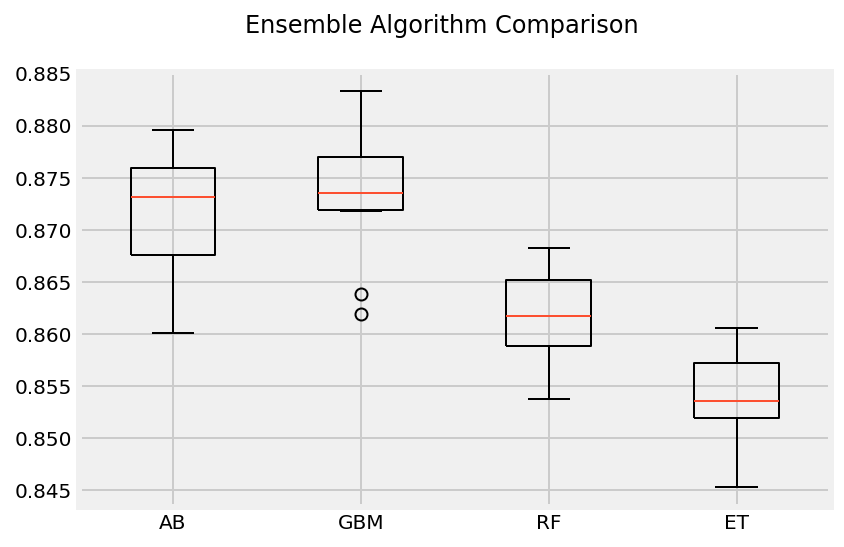

In [31]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

# 9.Finalize Model

In [32]:
scaler = StandardScaler().fit(X_train)  #
rescaledX = scaler.transform(X_train)
model =  GradientBoostingClassifier()
model.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8766725928698419
[[9093  105]
 [1213  276]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9198
           1       0.72      0.19      0.30      1489

   micro avg       0.88      0.88      0.88     10687
   macro avg       0.80      0.59      0.61     10687
weighted avg       0.86      0.88      0.84     10687



In [33]:
print('Baseline:'+ str(1-0.14181))

Baseline:0.85819
